# DESAFIOS Aula 2

## Base para os desafios

In [0]:
# Base da Aula 1
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format



filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")

filmes.columns = ["filmeId", "titulo", "generos"]
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [0]:
# Base da Aula 2
import seaborn as sns
import matplotlib.pyplot as plt

def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

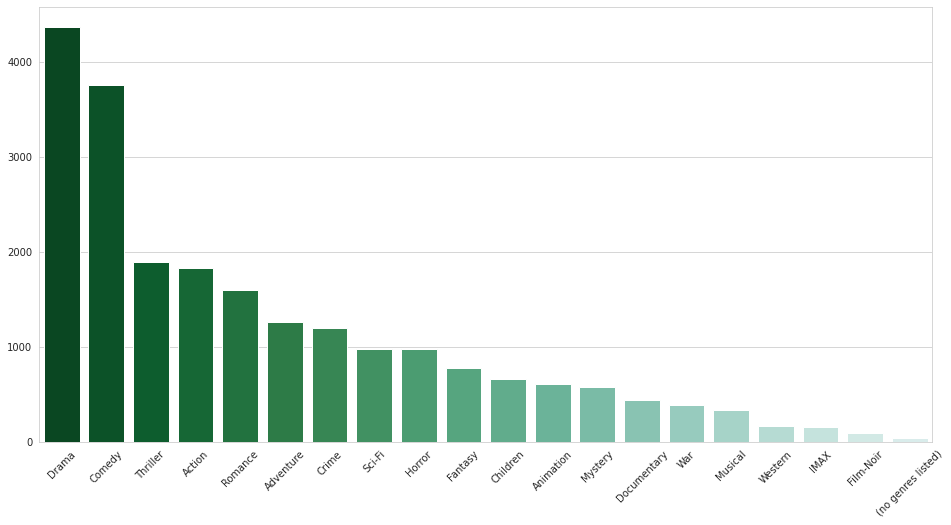

In [8]:
sns.set_style("whitegrid")
filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.xticks(rotation=45)
plt.show()

utilizei a função plt.xticks do matplotlib
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.xticks.html

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [0]:
 def plot_filme_2_o_retorno(complemento_titulo, filme_id):
  # Busco o nome do dataframe filmes
  filme_name = filmes.query(f"filmeId=={filme_id}")['titulo'].values[0]
  # Criei o Titulo 
  titulo = filme_name + complemento_titulo
  # Busco as avalições
  notas_do_filme = avaliacoes.query(f"filmeId=={filme_id}")["nota"]
  # Ploto o Gráfico 
  plt.figure(figsize=(12, 3))
  # subplot utilizado para colocar mais de um gráfico na mesma linha
  plt.subplot(121)
  plt.hist(notas_do_filme)
  plt.subplot(122)
  plt.boxplot(notas_do_filme)
  plt.suptitle(titulo)
  plt.show()

Refiz a funçao do grafico para mostrar o histograma e bloxplot na mesma linha utilizando a funcao subplot do matplotlib

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=subplot#matplotlib.pyplot.subplot

mean  var  count
filmeId                  
2683     3.20 1.48    121
2628     3.11 1.26    140
231      3.06 1.26    133
1097     3.77 1.15    122
344      3.04 1.15    161
1721     3.41 1.11    140
736      3.32 1.10    123
34       3.65 1.08    128
185      3.04 1.08    112
1206     4.00 1.02    120

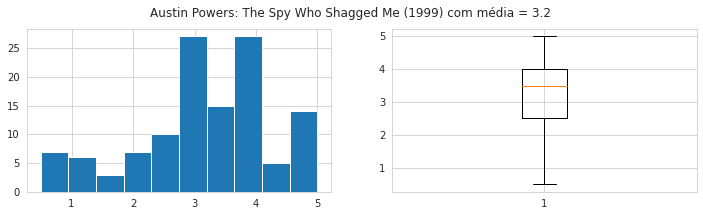

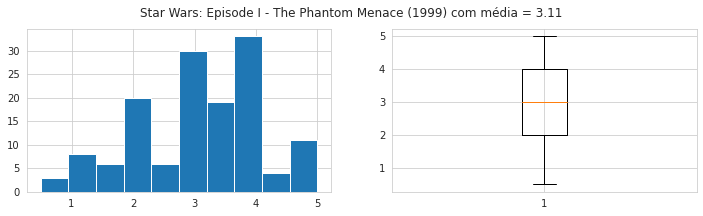

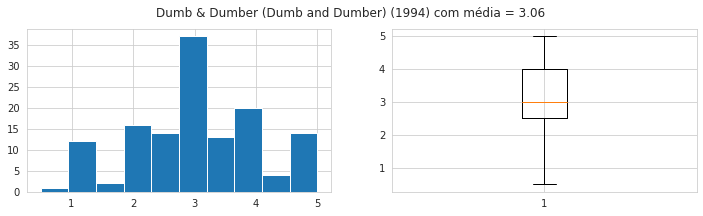

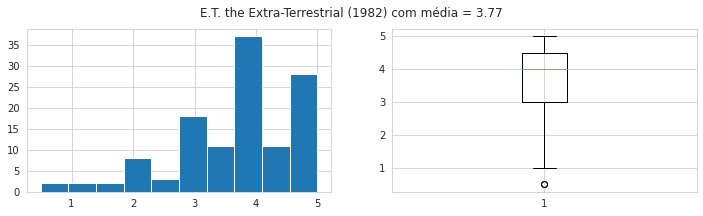

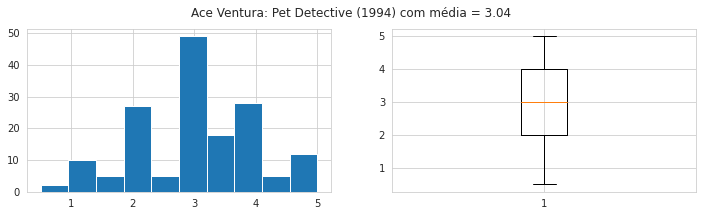

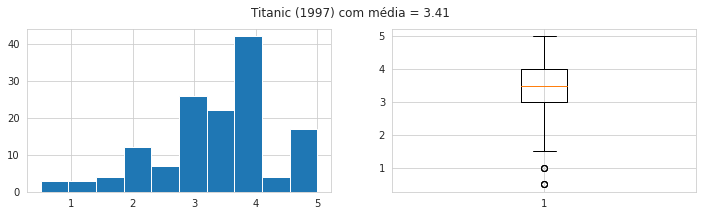

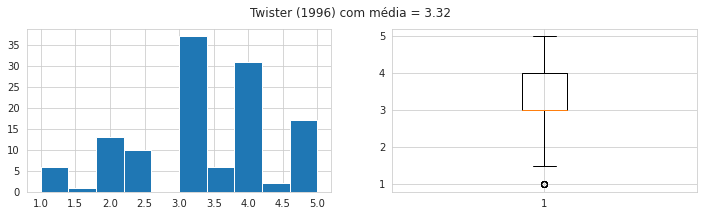

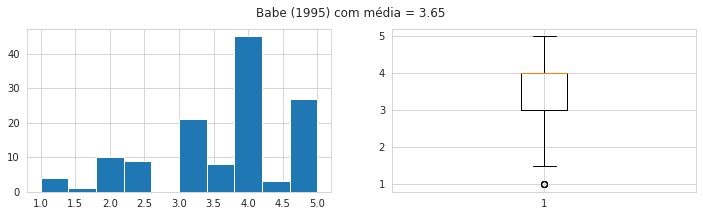

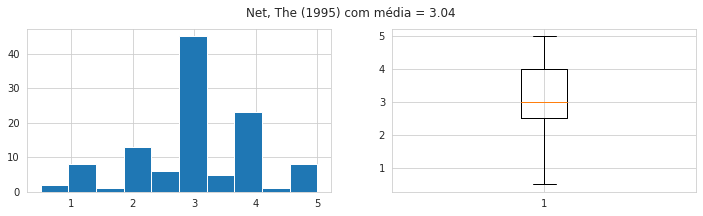

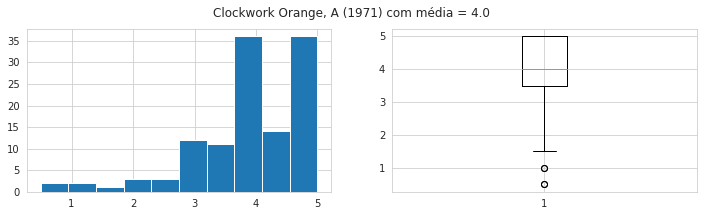

In [10]:
# Calculei a Média, Variância e Quantidade dos Votos
notas_medianas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].aggregate(['mean','var','count']).round(2)
# Selecionei os 100 mais votados
filmes_mais_votados = notas_medianas_medias_por_filme.sort_values(['count'], ascending=False).head(100)
# Ordenei por Variância e Média e selecionei os 10 primeiros
filmes_selecionados = filmes_mais_votados.sort_values(['var','mean'], ascending=False).head(10)
display((filmes_selecionados))
# Para cada filme selicionado gero um gráfico
for index, row in filmes_selecionados.iterrows():
  # Criei o complimento para Titulo 
  complemento_titulo = " com média = "+ str(row['mean'])
  # Utilizo a função plot_filme_2_o_retorno para gerar o gráfico
  plot_filme_2_o_retorno(complemento_titulo, index)


Utilizei a variância  por ser uma medida que expressa quanto os dados de um conjunto estão afastados de seu valor esperado, assim encontrar médias próximas e distribuições diferentes,


## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

votos                                     titulo
filmeId                                                  
356        329                        Forrest Gump (1994)
318        317           Shawshank Redemption, The (1994)
296        307                        Pulp Fiction (1994)
593        279           Silence of the Lambs, The (1991)
2571       278                         Matrix, The (1999)
260        251  Star Wars: Episode IV - A New Hope (1977)
480        238                       Jurassic Park (1993)
110        237                          Braveheart (1995)
589        224          Terminator 2: Judgment Day (1991)
527        220                    Schindler's List (1993)

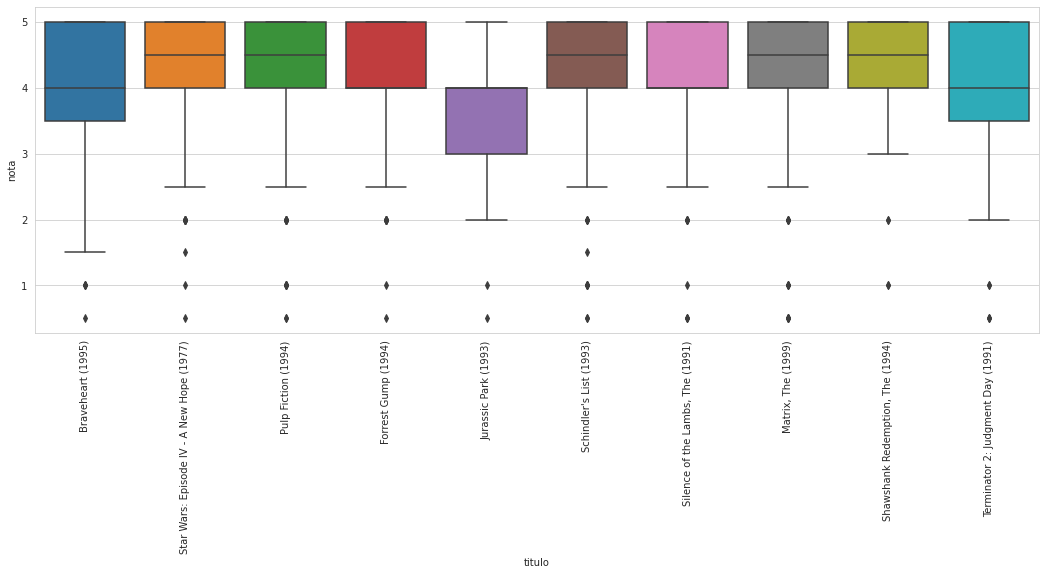

In [11]:
# O transformei o filmeId em índice no dataframe filmes
filmes_titulo = filmes.set_index('filmeId')
# Juntei filmes_titulo + avaliacoes
filmes_avalicoes_titulo = avaliacoes.join(filmes_titulo['titulo'], on="filmeId")
# Gerei uma lista dos mais votados
filmes_mais_votados = avaliacoes.groupby('filmeId')['nota'].aggregate(['count']).sort_values('count',ascending=False).head(10)
# Rotulei os mais votados
filmes_mais_votados_titulo = filmes_mais_votados.join(filmes_titulo['titulo'], on="filmeId").rename(columns={"count" : "votos"})
display(filmes_mais_votados_titulo)
# Realizei a query com filmes mais votados
filmes_mais_votados_titulo = filmes_avalicoes_titulo.query(f"filmeId in {filmes_mais_votados_titulo.index.tolist()}")
# Plotei o Gráfico
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
sns.boxplot(data = filmes_mais_votados_titulo, x=filmes_mais_votados_titulo['titulo'],  y="nota")
plt.show()

- Todas filmes os receberam nota máxima.
- Todos filmes possuem nota baixa (outliers).
- Excluindo os outliers o Braveheart foi unico com nota menor que 2.
- Shawshank Redemption é o segundo filme mais votado, possui as menores notas, ou seja, é o filme melhor avalisado.
- Jurrasic Park, com as menores notas pode ser considerado o pior filme dos selecionados.


## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

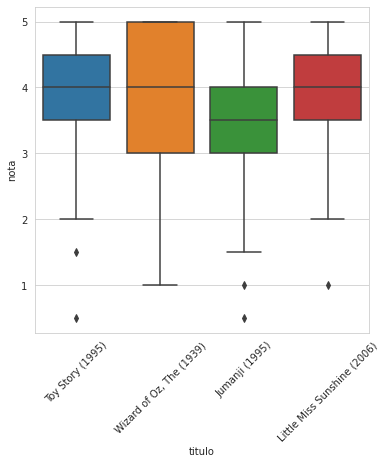

In [12]:
# O transformei o filmeId em índice no dataframe filmes
filmes_titulo = filmes.set_index('filmeId')
# Juntei filmes_titulo + avaliacoes
filmes_avalicoes_titulo = avaliacoes.join(filmes_titulo['titulo'], on="filmeId")
# Criei uma lista dos filmes selecionados
filmes_selecinados = [1,2,919,46578]
# Realizei a query
filmes_selecinados_titulo = filmes_avalicoes_titulo.query(f"filmeId in {filmes_selecinados}")
# Configurei o tamanho da Imagem, criei o boxplot e plotei
plt.figure(figsize=(6, 6))
sns.boxplot(data = filmes_selecinados_titulo, x=filmes_selecinados_titulo['titulo'],  y="nota")
plt.xticks(rotation=45)
plt.show()

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [13]:
from google.colab import data_table
# Calculei a Media e Mediana
notas_medianas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].aggregate(['mean','median']).round(2)
# Renomeei as colunas 
notas_medianas_medias_por_filme.columns = ["media", "mediana"]
# Adicionei as novas colunas no dataframe filmes
filmes_calculados = filmes.join(notas_medianas_medias_por_filme, on="filmeId")
# Calculei a Moda
notas_modas_por_filme = avaliacoes.groupby("filmeId")["nota"].aggregate(pd.Series.mode)
# Renomeei a Serie
notas_modas_por_filme  = notas_modas_por_filme.rename("moda")
# Adicionei as novas colunas no dataframe filmes
filmes_calculados = filmes_calculados.join(notas_modas_por_filme, on="filmeId")
# Selecionei as notas e mostrei ela com a funçao display do colab
notas_selecionadas = [0.5,3,5]
for nota in notas_selecionadas:
  print("\n\nFilmes com mediana = %s" % (nota))
  display(filmes_calculados.query(f"moda in {notas_selecionadas}"))
  



Filmes com mediana = 0.5


filmeId                                             titulo  ... mediana  moda
2           3                            Grumpier Old Men (1995)  ...    3.00  3.00
3           4                           Waiting to Exhale (1995)  ...    3.00  3.00
4           5                 Father of the Bride Part II (1995)  ...    3.00  3.00
6           7                                     Sabrina (1995)  ...    3.00  3.00
7           8                                Tom and Huck (1995)  ...    3.00  3.00
...       ...                                                ...  ...     ...   ...
9706   186587                                     Rampage (2018)  ...    3.00  3.00
9709   187593                                  Deadpool 2 (2018)  ...    4.00  5.00
9711   187717                   Won't You Be My Neighbor? (2018)  ...    5.00  5.00
9719   189111                                      Spiral (2018)  ...    3.00  3.00
9733   193567  anohana: The Flower We Saw That Day - The Movi...  ...    3.00  3.00

[2282 rows x 6 columns]



Filmes com mediana = 3


filmeId                                             titulo  ... mediana  moda
2           3                            Grumpier Old Men (1995)  ...    3.00  3.00
3           4                           Waiting to Exhale (1995)  ...    3.00  3.00
4           5                 Father of the Bride Part II (1995)  ...    3.00  3.00
6           7                                     Sabrina (1995)  ...    3.00  3.00
7           8                                Tom and Huck (1995)  ...    3.00  3.00
...       ...                                                ...  ...     ...   ...
9706   186587                                     Rampage (2018)  ...    3.00  3.00
9709   187593                                  Deadpool 2 (2018)  ...    4.00  5.00
9711   187717                   Won't You Be My Neighbor? (2018)  ...    5.00  5.00
9719   189111                                      Spiral (2018)  ...    3.00  3.00
9733   193567  anohana: The Flower We Saw That Day - The Movi...  ...    3.00  3.00

[2282 rows x 6 columns]



Filmes com mediana = 5


filmeId                                             titulo  ... mediana  moda
2           3                            Grumpier Old Men (1995)  ...    3.00  3.00
3           4                           Waiting to Exhale (1995)  ...    3.00  3.00
4           5                 Father of the Bride Part II (1995)  ...    3.00  3.00
6           7                                     Sabrina (1995)  ...    3.00  3.00
7           8                                Tom and Huck (1995)  ...    3.00  3.00
...       ...                                                ...  ...     ...   ...
9706   186587                                     Rampage (2018)  ...    3.00  3.00
9709   187593                                  Deadpool 2 (2018)  ...    4.00  5.00
9711   187717                   Won't You Be My Neighbor? (2018)  ...    5.00  5.00
9719   189111                                      Spiral (2018)  ...    3.00  3.00
9733   193567  anohana: The Flower We Saw That Day - The Movi...  ...    3.00  3.00

[2282 rows x 6 columns]

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


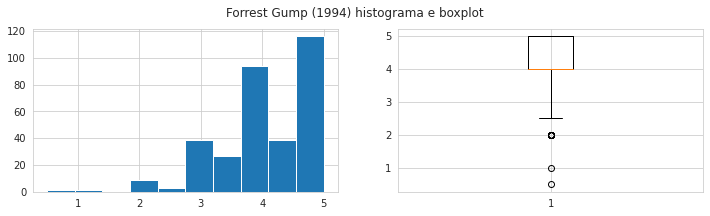

In [14]:
# Utilizei a mesma funçao do desafio 2
plot_filme_2_o_retorno(' histograma e boxplot ', 356)

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

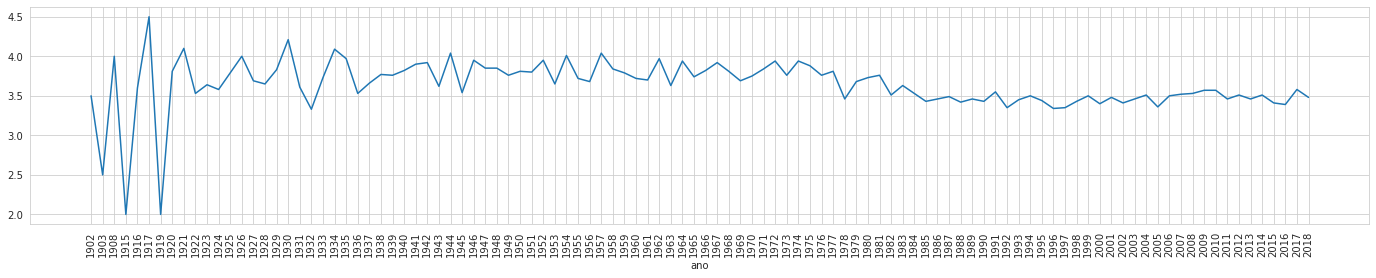

In [15]:
# extrai com extract o ano buscando no campo titulo (AAAA
filmes_avalicoes_titulo['ano'] = filmes_avalicoes_titulo["titulo"].str.extract(r'\s\((\d{4})')
# removi titulos sem Ano 
filmes_avalicoes_titulo_semvazio = filmes_avalicoes_titulo.dropna(subset=['ano'])
# Calculei a Média por ano
notas_medias_ano = filmes_avalicoes_titulo_semvazio.groupby('ano')['nota'].mean().round(2)
# Calculei a Numero de elementos
filmes_por_ano = filmes_avalicoes_titulo_semvazio['ano'].unique()
# Plotei o mesmo grafico do desafio1
plt.figure(figsize=(24,4))
sns.lineplot(x=notas_medias_ano.index,
            y=notas_medias_ano.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_ano) + 30))
plt.xticks(rotation=90)
plt.show()

**extract** - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html?highlight=str.extrac#pandas.Series.str.extract


**dropna** - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no twitter ou linkedin. Boa sorte!